In [10]:
from IPython.utils import io
import numpy as np
import collections

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import shuffle

import scipy.io
from scipy import signal,integrate
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import Input,Dense,LSTM,Dropout

import mne 
import math

import pickle

In [3]:
def load_data(dim):
    if dim=='valence':
        labels_all=np.load('DEAP/valence/' + 'all_valence_labels.npy',allow_pickle=True)
        data_all=np.load('DEAP/valence/' + 'all_valence_data.npy',allow_pickle=True)
        print("Valence :",labels_all.shape,data_all.shape)
    elif dim=='arousal':
        labels_all=np.load('DEAP/arousal/'+'all_arousal_labels.npy',allow_pickle=True)
        data_all=np.load('DEAP/arousal/'+'all_arousal_data.npy',allow_pickle=True)
        print("Arousal: ",labels_all.shape,data_all.shape)
    elif dim=='dominance':
        labels_all=np.load('DEAP/dominance/all_dominance_labels.npy',allow_pickle=True)
        data_all=np.load('DEAP/dominance/all_dominance_data.npy',allow_pickle=True)
        print("Dominance: ",labels_all.shape,data_all.shape) 
    return labels_all,data_all

In [4]:
labels_all_val,data_all_val=load_data(dim='valence')

Valence : (1064,) (1064, 32, 7680)


In [5]:
labels_all_ar,data_all_ar=load_data(dim='arousal')

Arousal:  (1105,) (1105, 32, 7680)


In [6]:
labels_all_dom,data_all_dom=load_data(dim='dominance')

Dominance:  (1122,) (1122, 32, 7680)


In [7]:
from sklearn.model_selection import train_test_split
data_all_val=data_all_val.reshape(1064,32*7680)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data_all_val,labels_all_val,test_size=0.2,random_state=42)
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape);

(851, 245760) (851,) (213, 245760) (213,)


In [10]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(Xtrain,Ytrain)
Ypred=svc.predict(Xtest)
print('Model accuracy score with default hyperparameters i.e C=1,kernel=rbf,gamma=auto : ',accuracy_score(Ytest,Ypred))

Model accuracy score with default hyperparameters i.e C=1,kernel=rbf,gamma=auto :  0.6713615023474179


In [13]:
svc=SVC(kernel='linear')
svc.fit(Xtrain,Ytrain)
Ypred=svc.predict(Xtest)
print('Model accuracy score after increasing the value of C i.e C=1.0,kernel=linear,gamma=auto : ',accuracy_score(Ytest,Ypred))

Model accuracy score after increasing the value of C i.e C=1000.0,kernel=rbf,gamma=auto :  0.676056338028169


In [15]:
data_all_ar=data_all_ar.reshape(1105,32*7680)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data_all_ar,labels_all_ar,test_size=0.2,random_state=42)
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape);

(884, 245760) (884,) (221, 245760) (221,)


In [24]:
svc=SVC(kernel='poly')
svc.fit(Xtrain,Ytrain)
Ypred=svc.predict(Xtest)
print('Model accuracy score with default hyperparameters i.e C=1,kernel=polynomial,gamma=auto : ',accuracy_score(Ytest,Ypred))

Model accuracy score with default hyperparameters i.e C=1,kernel=rbf,gamma=auto :  0.6334841628959276


In [40]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data_all_val,labels_all_val,test_size=0.2,random_state=42)
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape);

(851, 245760) (851,) (213, 245760) (213,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate the model
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model to the training set
    knn.fit(Xtrain,Ytrain)
    Ypred=knn.predict(Xtest)
    print('Model accuracy score with k=',i,' : ',accuracy_score(Ytest,Ypred))

Model accuracy score with k= 1  :  0.5727699530516432
Model accuracy score with k= 2  :  0.4647887323943662
Model accuracy score with k= 3  :  0.5821596244131455
Model accuracy score with k= 4  :  0.5539906103286385
Model accuracy score with k= 5  :  0.6009389671361502
Model accuracy score with k= 6  :  0.568075117370892
Model accuracy score with k= 7  :  0.5727699530516432
Model accuracy score with k= 8  :  0.5446009389671361
Model accuracy score with k= 9  :  0.6009389671361502
Model accuracy score with k= 10  :  0.5727699530516432
Model accuracy score with k= 11  :  0.6291079812206573
Model accuracy score with k= 12  :  0.6291079812206573
Model accuracy score with k= 13  :  0.6384976525821596
Model accuracy score with k= 14  :  0.6384976525821596
Model accuracy score with k= 15  :  0.6525821596244131
Model accuracy score with k= 16  :  0.6384976525821596
Model accuracy score with k= 17  :  0.6572769953051644
Model accuracy score with k= 18  :  0.6619718309859155
Model accuracy score

Minimum error:- 0.3665158371040724 at K = 32


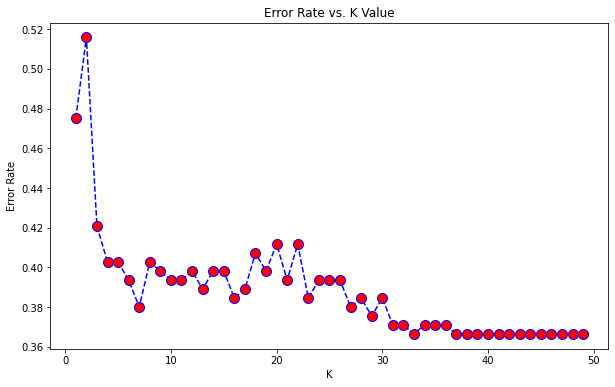

In [16]:
error_rate = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtrain,Ytrain)
 Ypred = knn.predict(Xtest)
 error_rate.append(np.mean(Ypred!= Ytest))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [42]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data_all_ar,labels_all_ar,test_size=0.2,random_state=42)
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape);

(884, 245760) (884,) (221, 245760) (221,)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model to the training set
    knn.fit(Xtrain,Ytrain)
    Ypred=knn.predict(Xtest)
    print('Model accuracy score with k=',i,' : ',accuracy_score(Ytest,Ypred))

Model accuracy score with k= 1  :  0.5248868778280543
Model accuracy score with k= 2  :  0.4841628959276018
Model accuracy score with k= 3  :  0.579185520361991
Model accuracy score with k= 4  :  0.5972850678733032
Model accuracy score with k= 5  :  0.5972850678733032
Model accuracy score with k= 6  :  0.6063348416289592
Model accuracy score with k= 7  :  0.6199095022624435
Model accuracy score with k= 8  :  0.5972850678733032
Model accuracy score with k= 9  :  0.6018099547511312
Model accuracy score with k= 10  :  0.6063348416289592
Model accuracy score with k= 11  :  0.6063348416289592
Model accuracy score with k= 12  :  0.6018099547511312
Model accuracy score with k= 13  :  0.6108597285067874
Model accuracy score with k= 14  :  0.6018099547511312
Model accuracy score with k= 15  :  0.6018099547511312
Model accuracy score with k= 16  :  0.6153846153846154
Model accuracy score with k= 17  :  0.6108597285067874
Model accuracy score with k= 18  :  0.5927601809954751
Model accuracy score